# Ford GoBike System Data Analysis



# Investigation Overview
This analysis is basically to know the average time used by our member to reach their destination and to know which of the week and day that thsy used the service more

# Dataset overview
The dataset consist of the duration of commur in seconds of over 180,000 observation. The other attribution include member age, user type, member gender and if bike is for all trip or not 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bike = pd.read_csv("201902-fordgobike-tripdata.csv")
print(bike.shape)
print(bike.info())
bike.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> This dataset has 183412 transaction records with 16 variables namely:	duration_sec, start_time, end_time	start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name	end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the average time weekday and in respect with hours of the day

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The member_birth year will be useful knowing the age that used most and also, gender, user_type, start_time, end_time will be useful knowning the periods and hours of the day that member used the bike most

## Testing for dirty and tidy issues

In [3]:
bike_clean = bike.copy()

In [4]:
bike_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
129224,629,2019-02-10 11:05:53.3820,2019-02-10 11:16:22.9160,369.0,Hyde St at Post St,37.787349,-122.416651,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,560,Subscriber,1998.0,Male,No
112193,640,2019-02-12 15:56:23.1180,2019-02-12 16:07:03.4260,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,101.0,15th St at Potrero Ave,37.767079,-122.407359,4821,Customer,1981.0,Male,No
43665,601,2019-02-22 16:13:47.5130,2019-02-22 16:23:49.2360,58.0,Market St at 10th St,37.776619,-122.417385,95.0,Sanchez St at 15th St,37.766219,-122.431060,3400,Subscriber,1996.0,Female,No
10048,386,2019-02-27 22:03:58.9890,2019-02-27 22:10:25.5980,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,145.0,29th St at Church St,37.743684,-122.426806,5902,Subscriber,1992.0,Female,No
68428,588,2019-02-19 22:40:08.5600,2019-02-19 22:49:56.5720,323.0,Broadway at Kearny,37.798014,-122.405950,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6591,Subscriber,1993.0,Male,No
147979,300,2019-02-07 06:39:17.0770,2019-02-07 06:44:17.8080,188.0,Dover St at 57th St,37.842630,-122.267738,241.0,Ashby BART Station,37.852477,-122.270213,4495,Subscriber,1978.0,Female,No
166267,798,2019-02-04 19:14:32.6230,2019-02-04 19:27:51.3120,129.0,Harrison St at 20th St,37.758862,-122.412544,134.0,Valencia St at 24th St,37.752428,-122.420628,5474,Customer,1996.0,Female,No
119165,933,2019-02-11 17:58:41.6690,2019-02-11 18:14:15.3530,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,127.0,Valencia St at 21st St,37.756708,-122.421025,5424,Subscriber,1993.0,Female,No
70657,411,2019-02-19 18:07:26.1750,2019-02-19 18:14:17.6600,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,78.0,Folsom St at 9th St,37.773717,-122.411647,5007,Subscriber,1982.0,Male,No
6468,462,2019-02-28 10:12:36.9160,2019-02-28 10:20:19.4050,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,50.0,2nd St at Townsend St,37.780526,-122.390288,5941,Subscriber,1970.0,Male,No


In [5]:
bike_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The duration_sec columns seem to have a very high ouliers with 75% around less than 800sec and maximum value over 85k sec

In [6]:
count = ["start_station_name","end_station_name", "user_type", "member_gender","bike_share_for_all_trip"]
for col in count:
    print(col, bike_clean[col].nunique())
        
count

start_station_name 329
end_station_name 329
user_type 2
member_gender 3
bike_share_for_all_trip 2


['start_station_name',
 'end_station_name',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip']

In [7]:
bike_clean["member_gender"].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
bike_clean[bike_clean.member_gender.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [9]:
bike_clean[bike_clean.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


## Dirty & Tidy Issues

1. Zero after start_station_id, end_station_id and meneber_birth_year columns
2. start_time and end_time not in datetime datatype
3. Missing value for member_gender, member_birth_year, and station details columns
4. Unnecesary columns for our analysis eg start_station_latitude,start_staion_longitude,  end_station_latitude, end_station_longititude

## Issue #1

#### Define
Remove ending zeros from start_station_id, end_station_id and meneber_birth_year columns

### Code

In [10]:
zero_end_col =["member_birth_year","start_station_id", "end_station_id"]

In [11]:
for col in zero_end_col:
    bike_clean[col]=bike_clean[col].astype(str).str.extract(r"([0-9]+)\.0")

### Test

In [12]:
bike_clean[zero_end_col].head(10)

,member_birth_year,start_station_id,end_station_id
0,1984,21,13
1,NaN,23,81
2,1972,86,3
3,1989,375,70
4,1974,7,222
5,1959,93,323
6,1983,300,312
7,1989,10,127
8,1988,10,127
9,1992,19,121


##  Issue #2

### Define
Covert start_time and end_time to datetime object data type

### Code

In [13]:
bike_clean["start_time"]= pd.to_datetime(bike_clean["start_time"]).astype(str).str.extract("(.+)\.\w+")
bike_clean["end_time"]= pd.to_datetime(bike_clean["end_time"]).astype(str).str.extract("(.+)\.\w+")

In [14]:
bike_clean["start_time"]= pd.to_datetime(bike_clean["start_time"])
bike_clean["end_time"]= pd.to_datetime(bike_clean["end_time"])

### Test


In [15]:
print(bike_clean[["start_time", "end_time"]].dtypes)
bike_clean[["start_time", "end_time"]]

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object


,start_time,end_time
0,2019-02-28 17:32:10,2019-03-01 08:01:55
1,2019-02-28 18:53:21,2019-03-01 06:42:03
2,2019-02-28 12:13:13,2019-03-01 05:24:08
3,2019-02-28 17:54:26,2019-03-01 04:02:36
4,2019-02-28 23:54:18,2019-03-01 00:20:44
...,...,...
183407,2019-02-01 00:04:49,2019-02-01 00:12:50
183408,2019-02-01 00:05:34,2019-02-01 00:10:48
183409,2019-02-01 00:06:05,2019-02-01 00:08:27
183410,2019-02-01 00:05:34,2019-02-01 00:07:54


## Issue #3

### Define
Fix columns with null values

### Code

In [16]:
bike_clean.dropna(inplace=True)

### Test

In [17]:
len(bike_clean.isna())== bike_clean.shape[0]

True

# Feature engineering

Since we are going to working with age, month name and hours let extract this columns from our dataset

## First extracting

From start_date and end_date columns let extract the month and day name from both columns

In [18]:
bike_clean.start_time.dt.strftime("%b").unique()

array(['Feb'], dtype=object)

With the above code, this shows that this dataset is generated for only the month of february 2019, Hence all our analysis with be based on this month data. Let continue to exctract the hour of the day that the transaction take place

In [19]:
bike_clean["start_hour"]=bike_clean.start_time.dt.hour
bike_clean["end_hour"]=bike_clean.end_time.dt.hour

Finally let extract day name

In [20]:
bike_clean["start_weekday"]=bike_clean.start_time.dt.day_name().apply(lambda x: x[:3])
bike_clean["end_weekday"]=bike_clean.end_time.dt.day_name().apply(lambda x: x[:3])

## Second extraction

Also, since we want no analyse this dataset based on hour, let set duration on activity to hours by dividing the duration_sec by 60

In [21]:
bike_clean["duration_min"]= bike_clean.duration_sec/60
bike_clean.duration_min.dtype

dtype('float64')

## Third extraction

Knowing the age of a member will be usedful for our analysis, since this datatset is generated in 2019 this implies that we have to subtract memeber age from 2019 to get thier age at the  moment and not the year this analysis is made

In [22]:
bike_clean["member_age"]= bike_clean.member_birth_year.apply(lambda x: 2019 - int(x)).astype(int)

In [23]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_weekday,end_weekday,duration_min,member_age
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,17,8,Thu,Fri,869.750000,35
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,12,5,Thu,Fri,1030.900000,47
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,17,4,Thu,Fri,608.166667,30
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,23,0,Thu,Fri,26.416667,45
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,23,0,Thu,Fri,29.883333,60


## Distribution of duration in minute
The distrution in minute take on very high value from 0-1000 from about 180k dataset. The distribution is unimodal at around to minute and is more normal than how it is on linear scale

Text(0.5, 0, 'Duration in min')

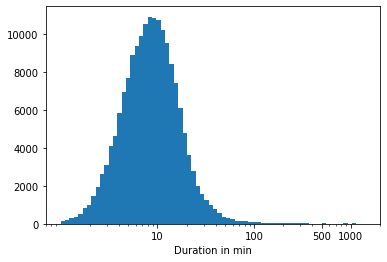

In [24]:
binsize = 0.045
bins = 10**np.arange(0,np.log10(bike_clean.duration_min.max())+binsize,binsize)
plt.hist(data=bike_clean, x="duration_min", bins= bins)
plt.xscale("log")
plt.xticks([10,100,500,1000],[10,100,500,1000])
plt.xlabel("Duration in min")

The duration_min looks normal on log scale but still slightly skewed to the right

In [25]:
bike_clean.duration_min.mean()

11.733379060161264

In [26]:
hours_outliers= bike_clean["duration_min"]<120
bike_clean = bike_clean.loc[hours_outliers,:]

Now since log transform of duration_min is more normal under log transformation let create a log transformation columns for the duration in min columns

In [27]:
bike_clean["log_duration_min"]= bike_clean.duration_min.apply(np.log10)

## Distribution of age
Age is also unimodal and shows that people between 20years and 40years are the one using the bike system frequently althought people of over 60 years used the bike but their are filtered out for the rest of the analysis

Text(0.5, 0, 'Member age')

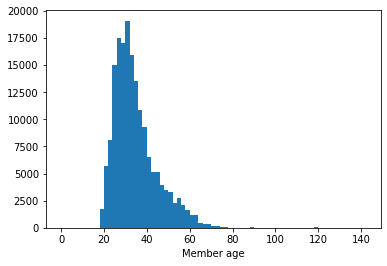

In [28]:
binsize= 2
bins = np.arange(0,max(bike_clean.member_age)+binsize,binsize)
plt.hist(data=bike_clean, x="member_age", bins= bins)
plt.xlabel("Member age")

Ths histogram above shows that people with age 20-40 are this one using this bike service this most, on the other hands having head greater than 60 years riding bike could cause biaseness for out analysis. Let make further finding with a boxplot

In [29]:
bike_clean= bike_clean[bike_clean["member_age"]<60]


## Correlation between duration and age
The scatter plot shows that the age does not affect the duration used by the member to reach theie destination

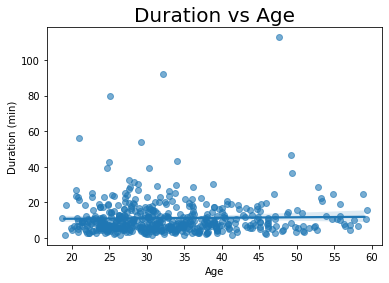

In [30]:
sample = np.random.choice(bike_clean.shape[0], 500)
bike_sample= bike_clean.iloc[sample,:]
sb.regplot(data=bike_sample, x="member_age", y="duration_min", scatter_kws={"alpha":0.6}, x_jitter=0.4)
plt.title("Duration vs Age", fontdict={"size":20})
plt.xlabel("Age")
plt.ylabel("Duration (min)");

# Average duration trip by weekday and hours
The average hours used tends to increase during the weekend this is a  resort the most of the weekend rides are basically for recreationa and not working as mid-week

In [31]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri","Sat", "Sun"]
days_class= pd.api.types.CategoricalDtype(categories=days, ordered=True)
bike_clean["start_weekday"]= bike_clean["start_weekday"].astype(days_class)
bike_clean["end_weekday"]=bike_clean["end_weekday"].astype(days_class)

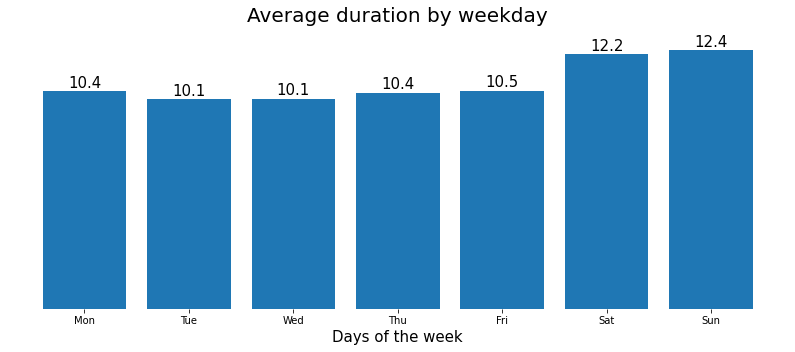

In [32]:
duration_weekday = bike_clean.groupby("start_weekday")["duration_min"].mean()
plt.figure(figsize=[14,5])
ax = plt.bar(x=duration_weekday.index, height= duration_weekday)
plt.grid(axis="y")
plt.title("Average duration by weekday", fontdict={"size":20}, pad=15)
plt.gca().set(frame_on=False)
plt.yticks([])
plt.xlabel("Days of the week", fontdict={"size":15})
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Percentage of ride by weekday and hour
Percentage of rides tends to be lower during the weekend shows that memeber are basically using bike to transit to work to and fro in other to reach their places of work as soon as possible since bike can move freely in traffic than cars

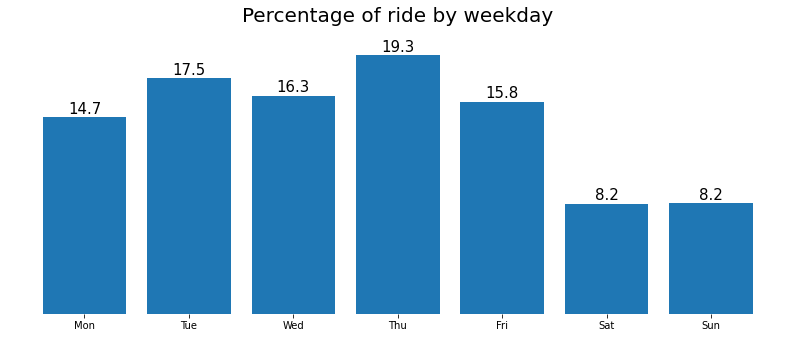

In [33]:
weekday_ride_per = (bike_clean.groupby("start_weekday")["bike_id"].size()/len(bike_clean))*100
plt.figure(figsize=[14,5])
ax = plt.bar(x=weekday_ride_per.index, height=weekday_ride_per)
plt.gca().set(frame_on=False)
plt.yticks([])
plt.title("Percentage of ride by weekday", fontdict={"size":20}, pad=20)
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## Percentage of ride by Hour of the day
This justify our assumption that people used the bike for transit to work mostly. There seems to be strong interaction on hour of the day that people rides most which are specifically between 7am-8am and 4pm-5pm which the respective time member go to work and return back from work 

Text(0, 0.5, 'Percentage(%)')

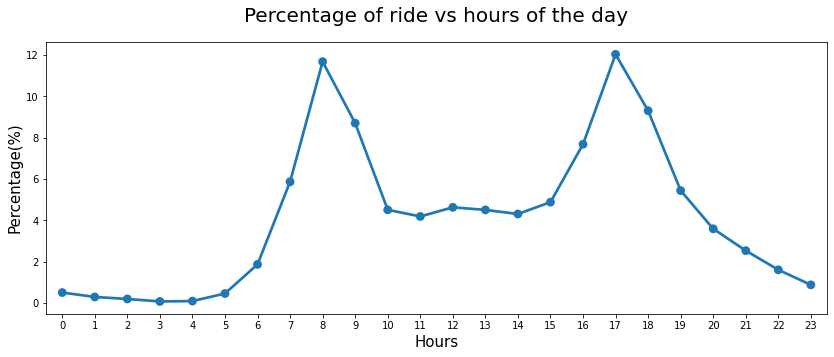

In [34]:
hour_ride_per = (bike_clean.groupby("start_hour")["bike_id"].size()/len(bike_clean))*100
plt.figure(figsize=[14,5])
ax= sb.pointplot(x=hour_ride_per.index, y=hour_ride_per)
plt.title("Percentage of ride vs hours of the day", fontdict={"size":20}, pad=20)
plt.xlabel("Hours",fontdict={"size":15})
plt.ylabel("Percentage(%)",fontdict={"size":15})

# Percentage by gender and Their average duration
Male are more than female riding the bike and spend less time to reach their destination than femlae, this turns out as exepected already

Text(0.5, 1.0, 'Average duration by Gender')

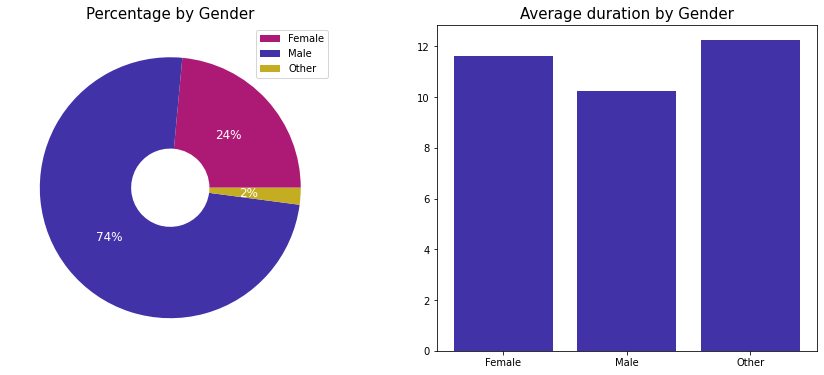

In [35]:
per_by_gender = (bike_clean.groupby("member_gender").size()/len(bike_clean))*100
average_duration= bike_clean.groupby("member_gender")["duration_min"].mean()
fig, ax= plt.subplots(ncols= 2, figsize=[15,6])
color = ["#ad1a75","#4232a8","#c4ac23"]
plt.subplot(1,2,1)
ax[0]=plt.pie(per_by_gender, labels=per_by_gender.index, colors=color, autopct="%.0f%%", wedgeprops={"width":0.7}, textprops={"color":"w", "size":12})
plt.title("Percentage by Gender", fontdict={"size":15})
plt.legend(loc= 1)
plt.subplot(1,2,2)
ax[1]=plt.bar(x=average_duration.index, height=average_duration, color= color[1])
plt.title("Average duration by Gender", fontdict={"size":15})

## Percentage to user type	and their average ride duration
Suscriber are 91% percent of people riding and they spend less duration time than the customer, this is futher need to be investgated in future analysis

Text(0.5, 1.0, 'Average duration by user type')

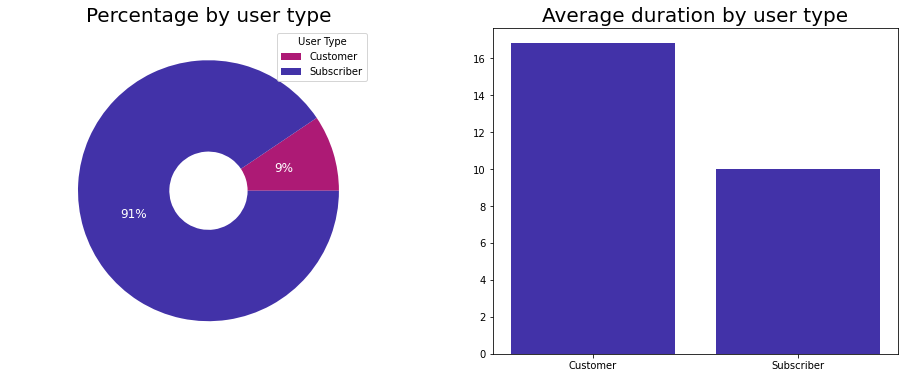

In [36]:
per_by_user_type = (bike_clean.groupby("user_type").size()/len(bike_clean))*100
average_duration= bike_clean.groupby("user_type")["duration_min"].mean()
fig, ax= plt.subplots(ncols= 2, figsize=[16,6])
color = ["#ad1a75","#4232a8","#c4ac23"]
plt.subplot(1,2,1)
ax[0]=plt.pie(per_by_user_type, labels=per_by_user_type.index, colors=color, autopct="%.0f%%", wedgeprops={"width":0.7}, textprops={"color":"w", "size":12})
plt.title("Percentage by user type", fontdict={"size":20})
plt.legend(title="User Type")
plt.subplot(1,2,2)
ax[1]=plt.bar(x=average_duration.index, height=average_duration, color= color[1])
plt.title("Average duration by user type", fontdict={"size":20})


### what is the average duration type by each user type ?
We can conclude here that avearge duration tends to increase during the weekend basically becuase of suscriber using the bike as form of recreation as we only see suscriber having slight increase   

Text(0.5, 0, 'Day of the week')

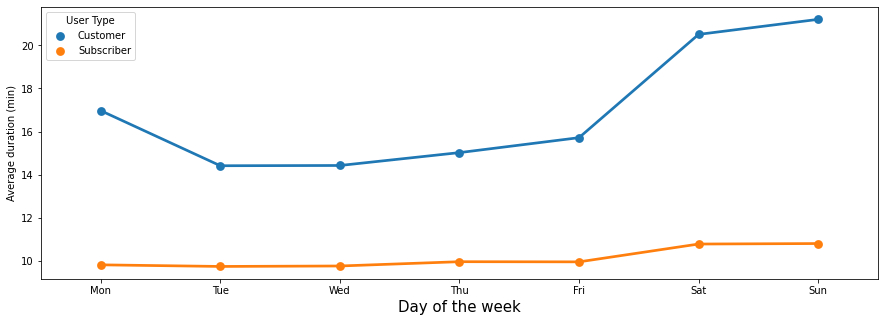

In [37]:
avg_week_user_type= bike_clean.groupby(["user_type", "start_weekday"])["duration_min"].mean().reset_index()
plt.figure(figsize=[15,5])
sb.pointplot(data=avg_week_user_type, x="start_weekday", y="duration_min", hue="user_type")
plt.legend(title= "User Type")
plt.ylabel("Average duration (min)")
plt.xlabel("Day of the week", fontdict={"size":15})

## Average duration vs hours of the day by user type
Customer generally have long duartion time than suscriber almost at every our of the day than their fellow suscriber

<AxesSubplot:xlabel='start_hour', ylabel='duration_min'>

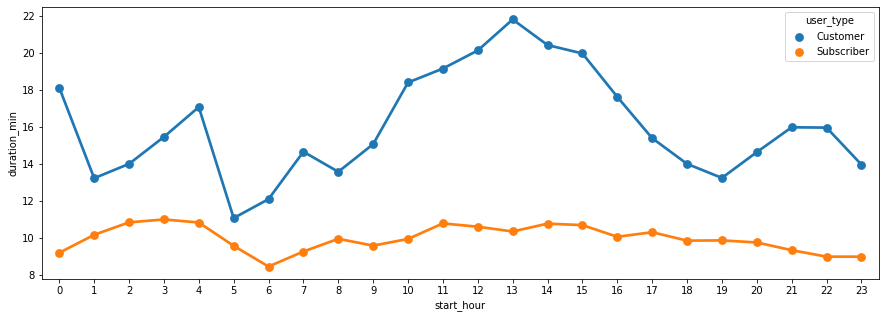

In [40]:
avg_week_user_type= bike_clean.groupby(["user_type", "start_hour"])["duration_min"].mean().reset_index()
plt.figure(figsize=[15,5])
sb.pointplot(data=avg_week_user_type, x="start_hour", y="duration_min", hue="user_type")

In [39]:
!jupyter nbconvert Part_I_exploration_template-Copy1.ipynb --to slides 

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Part_I_exploration_template-Copy1.ipynb' matched no files
